In [4]:
import os
import wfdb
import pandas as pd
import numpy as np
from tqdm import tqdm
import neurokit2 as nk
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
base_path = "/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500"

record_paths = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".dat"):
            record_paths.append(os.path.join(root, file).replace(".dat", ""))

print("Найдено файлов:", len(record_paths))

Найдено файлов: 21837


In [6]:
db_csv = "/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptbxl_database.csv"
meta = pd.read_csv(db_csv)

meta["record_name"] = meta["filename_hr"].apply(lambda x: os.path.basename(x))
meta["record_name"] = meta["record_name"].str.replace(".dat", "")

In [11]:
fs = 500  # частота дискретизации
records = []
for path in tqdm(record_paths, desc="Обработка сигналов"):
    record = wfdb.rdrecord(path)
    signal = record.p_signal[:, 1]  # возьмём отведение II
    record_name = record.record_name

    try:
        signals, info = nk.ecg_process(signal, sampling_rate=fs)
        cleaned_signal = signals['ECG_Clean']

        q_peaks_idx = np.where(signals['ECG_Q_Peaks'] == 1)[0]
        r_peaks_idx = np.where(signals['ECG_R_Peaks'] == 1)[0]
        t_peaks_idx = np.where(signals['ECG_T_Peaks'] == 1)[0]
        s_peaks_idx = np.where(signals['ECG_S_Peaks'] == 1)[0]
        p_peaks_idx = np.where(signals['ECG_P_Peaks'] == 1)[0]

        q_peaks = np.mean(cleaned_signal[q_peaks_idx]) if len(q_peaks_idx) > 0 else 0
        r_peaks = np.mean(cleaned_signal[r_peaks_idx]) if len(r_peaks_idx) > 0 else 0
        s_peaks = np.mean(cleaned_signal[s_peaks_idx]) if len(s_peaks_idx) > 0 else 0
        p_peaks = np.mean(cleaned_signal[p_peaks_idx]) if len(p_peaks_idx) > 0 else 0
        t_peaks = np.mean(cleaned_signal[t_peaks_idx]) if len(t_peaks_idx) > 0 else 0

        mean_signal = np.mean(cleaned_signal)
        std_signal = np.std(cleaned_signal)

        heart_rate = np.mean(signals['ECG_Rate'])

        records.append({
            "record_name": record_name,
            "mean_signal": mean_signal, 
            "std_signal": std_signal, 
            "Q_peaks": q_peaks,
            "R_peaks": r_peaks,
            "T_peaks": t_peaks,
            "P_peaks": p_peaks,
            "S_peaks": s_peaks,
            "heart_rate": heart_rate
        })
    except Exception as e:
        print(f'{e}')
        continue

features_df = pd.DataFrame(records)
print("Извлечено признаков:", features_df.shape)

Обработка сигналов:   0%|          | 36/21837 [00:05<55:10,  6.59it/s] /usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   1%|          | 175/21837 [00:26<53:16,  6.78it/s]  /usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:   1%|          | 177/21837 [00:27<42:53,  8.42it/s]

cannot convert float NaN to integer


Обработка сигналов:   1%|          | 261/21837 [00:40<55:02,  6.53it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:   1%|          | 263/21837 [00:40<42:01,  8.56it/s]

integer division or modulo by zero


Обработка сигналов:   2%|▏         | 448/21837 [01:08<51:31,  6.92it/s]  /usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:   2%|▏         | 450/21837 [01:08<41:52,  8.51it/s]

integer division or modulo by zero


Обработка сигналов:   2%|▏         | 490/21837 [01:15<55:09,  6.45it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   2%|▏         | 492/21837 [01:15<56:00,  6.35it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:   2%|▏         | 494/21837 [01:15<45:06,  7.89it/s]

cannot convert float NaN to integer


Обработка сигналов:   2%|▏         | 506/21837 [01:17<53:24,  6.66it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:   2%|▏         | 508/21837 [01:17<42:37,  8.34it/s]

integer division or modulo by zero


Обработка сигналов:   3%|▎         | 589/21837 [01:30<55:52,  6.34it/s]  /usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   3%|▎         | 595/21837 [01:31<56:13,  6.30it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   3%|▎         | 603/21837 [01:32<55:04,  6.43it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   3%|▎         | 645/21837 [01:38<56:07,  6.29it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in r

cannot convert float NaN to integer


Обработка сигналов:   5%|▌         | 1172/21837 [02:59<52:22,  6.58it/s]  /usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   5%|▌         | 1184/21837 [03:01<50:57,  6.75it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   5%|▌         | 1188/21837 [03:01<47:42,  7.21it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   5%|▌         | 1193/21837 [03:02<50:40,  6.79it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered 

cannot convert float NaN to integer


Обработка сигналов:   9%|▊         | 1877/21837 [04:46<52:11,  6.37it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   9%|▊         | 1904/21837 [04:50<46:45,  7.11it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:   9%|▉         | 1925/21837 [04:53<46:59,  7.06it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:   9%|▉         | 1927/21837 [04:53<37:29,  8.85it/s]

cannot convert float NaN to integer


Обработка сигналов:  11%|█▏        | 2473/21837 [06:16<51:23,  6.28it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  12%|█▏        | 2661/21837 [06:45<52:39,  6.07it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  12%|█▏        | 2729/21837 [06:56<51:01,  6.24it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  13%|█▎        | 2837/21837 [07:12<50:40,  6.25it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in

cannot convert float NaN to integer


Обработка сигналов:  16%|█▌        | 3469/21837 [08:49<47:36,  6.43it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  16%|█▌        | 3471/21837 [08:49<36:36,  8.36it/s]

integer division or modulo by zero


Обработка сигналов:  16%|█▌        | 3545/21837 [09:01<45:50,  6.65it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  16%|█▌        | 3547/21837 [09:01<35:27,  8.60it/s]

integer division or modulo by zero


Обработка сигналов:  17%|█▋        | 3627/21837 [09:13<45:40,  6.64it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  17%|█▋        | 3785/21837 [09:37<48:08,  6.25it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  18%|█▊        | 3851/21837 [09:47<46:08,  6.50it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  18%|█▊        | 3863/21837 [09:49<43:19,  6.91it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in

cannot convert float NaN to integer


Обработка сигналов:  19%|█▉        | 4147/21837 [10:33<43:16,  6.81it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  19%|█▉        | 4149/21837 [10:33<44:27,  6.63it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


cannot convert float NaN to integer


Обработка сигналов:  20%|██        | 4407/21837 [11:13<45:32,  6.38it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  21%|██        | 4590/21837 [11:41<45:32,  6.31it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  21%|██        | 4594/21837 [11:42<44:39,  6.43it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  21%|██        | 4637/21837 [11:49<44:20,  6.46it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in

cannot convert float NaN to integer


Обработка сигналов:  24%|██▍       | 5270/21837 [13:27<44:54,  6.15it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  24%|██▍       | 5285/21837 [13:30<42:05,  6.55it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  24%|██▍       | 5327/21837 [13:36<46:27,  5.92it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  25%|██▍       | 5360/21837 [13:42<41:45,  6.58it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to 

cannot convert float NaN to integer


Обработка сигналов:  25%|██▌       | 5531/21837 [14:08<39:16,  6.92it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  26%|██▌       | 5638/21837 [14:24<41:36,  6.49it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  26%|██▌       | 5720/21837 [14:37<41:04,  6.54it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  26%|██▋       | 5781/21837 [14:46<41:22,  6.47it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to 

cannot convert float NaN to integer


Обработка сигналов:  27%|██▋       | 5800/21837 [14:49<44:17,  6.03it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  27%|██▋       | 5809/21837 [14:51<39:36,  6.74it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  27%|██▋       | 5820/21837 [14:52<43:11,  6.18it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  27%|██▋       | 5822/21837 [14:52<33:38,  7.93it/s]

cannot convert float NaN to integer


Обработка сигналов:  27%|██▋       | 5930/21837 [15:09<40:44,  6.51it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  27%|██▋       | 5932/21837 [15:10<32:00,  8.28it/s]

cannot convert float NaN to integer


Обработка сигналов:  27%|██▋       | 5988/21837 [15:18<42:49,  6.17it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  28%|██▊       | 6033/21837 [15:25<38:50,  6.78it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  28%|██▊       | 6115/21837 [15:38<39:13,  6.68it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  28%|██▊       | 6122/21837 [15:39<39:27,  6.64it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in

cannot convert float NaN to integer


Обработка сигналов:  30%|███       | 6636/21837 [16:59<39:28,  6.42it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  30%|███       | 6638/21837 [17:00<30:47,  8.23it/s]

integer division or modulo by zero


Обработка сигналов:  30%|███       | 6659/21837 [17:03<40:35,  6.23it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  31%|███       | 6661/21837 [17:03<32:13,  7.85it/s]

cannot convert float NaN to integer


Обработка сигналов:  31%|███       | 6678/21837 [17:06<42:37,  5.93it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  31%|███       | 6718/21837 [17:12<41:00,  6.15it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  31%|███       | 6720/21837 [17:12<31:59,  7.88it/s]

integer division or modulo by zero


Обработка сигналов:  31%|███       | 6734/21837 [17:14<38:06,  6.61it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  31%|███       | 6736/21837 [17:14<28:59,  8.68it/s]

cannot convert float NaN to integer


Обработка сигналов:  31%|███       | 6803/21837 [17:25<41:31,  6.03it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  31%|███▏      | 6829/21837 [17:29<39:32,  6.33it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  32%|███▏      | 6886/21837 [17:38<38:56,  6.40it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  32%|███▏      | 7037/21837 [18:02<38:34,  6.40it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in

cannot convert float NaN to integer


Обработка сигналов:  33%|███▎      | 7269/21837 [18:38<39:52,  6.09it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  33%|███▎      | 7271/21837 [18:38<31:33,  7.69it/s]

cannot convert float NaN to integer


Обработка сигналов:  34%|███▎      | 7356/21837 [18:51<39:04,  6.18it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  34%|███▍      | 7383/21837 [18:55<36:44,  6.56it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  34%|███▍      | 7416/21837 [19:00<36:25,  6.60it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  35%|███▌      | 7643/21837 [19:36<36:50,  6.42it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in

cannot convert float NaN to integer


Обработка сигналов:  40%|████      | 8775/21837 [22:31<32:36,  6.68it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  41%|████      | 8875/21837 [22:47<33:01,  6.54it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  41%|████▏     | 9056/21837 [23:15<33:18,  6.39it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  42%|████▏     | 9192/21837 [23:36<33:40,  6.26it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in

cannot convert float NaN to integer


Обработка сигналов:  51%|█████     | 11055/21837 [28:25<28:00,  6.42it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  51%|█████     | 11057/21837 [28:25<22:26,  8.00it/s]

integer division or modulo by zero


Обработка сигналов:  51%|█████▏    | 11236/21837 [28:53<28:09,  6.27it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  51%|█████▏    | 11238/21837 [28:53<21:18,  8.29it/s]

integer division or modulo by zero


Обработка сигналов:  52%|█████▏    | 11359/21837 [29:12<30:42,  5.69it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  54%|█████▍    | 11862/21837 [30:31<27:44,  5.99it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  55%|█████▌    | 12071/21837 [31:03<27:10,  5.99it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  57%|█████▋    | 12376/21837 [31:50<25:36,  6.16it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountere

cannot convert float NaN to integer


Обработка сигналов:  58%|█████▊    | 12584/21837 [32:23<24:00,  6.42it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  58%|█████▊    | 12586/21837 [32:23<18:47,  8.20it/s]

cannot convert float NaN to integer


Обработка сигналов:  58%|█████▊    | 12608/21837 [32:26<23:55,  6.43it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  59%|█████▉    | 12855/21837 [33:05<23:24,  6.40it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  59%|█████▉    | 12889/21837 [33:10<24:01,  6.21it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  59%|█████▉    | 12891/21837 [33:11<18:09,  8.21it/s]

cannot convert float NaN to integer


Обработка сигналов:  61%|██████    | 13254/21837 [34:07<20:30,  6.98it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  61%|██████    | 13295/21837 [34:13<21:48,  6.53it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  61%|██████▏   | 13399/21837 [34:29<22:05,  6.36it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  61%|██████▏   | 13413/21837 [34:31<20:57,  6.70it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountere

cannot convert float NaN to integer


Обработка сигналов:  63%|██████▎   | 13727/21837 [35:20<21:31,  6.28it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  65%|██████▍   | 14102/21837 [36:17<19:31,  6.61it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  65%|██████▍   | 14159/21837 [36:26<19:34,  6.54it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  65%|██████▍   | 14161/21837 [36:26<16:00,  7.99it/s]

cannot convert float NaN to integer


Обработка сигналов:  66%|██████▌   | 14319/21837 [36:50<19:18,  6.49it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  66%|██████▌   | 14321/21837 [36:51<15:11,  8.25it/s]

cannot convert float NaN to integer


Обработка сигналов:  66%|██████▌   | 14451/21837 [37:10<18:07,  6.79it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  66%|██████▋   | 14494/21837 [37:17<19:25,  6.30it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  66%|██████▋   | 14496/21837 [37:17<15:21,  7.96it/s]

cannot convert float NaN to integer


Обработка сигналов:  67%|██████▋   | 14636/21837 [37:39<18:06,  6.63it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  67%|██████▋   | 14719/21837 [37:52<18:32,  6.40it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  68%|██████▊   | 14922/21837 [38:23<18:21,  6.28it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  68%|██████▊   | 14929/21837 [38:24<18:58,  6.07it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountere

cannot convert float NaN to integer


Обработка сигналов:  70%|███████   | 15319/21837 [39:25<16:55,  6.42it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  71%|███████   | 15545/21837 [40:01<16:53,  6.21it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  76%|███████▋  | 16664/21837 [42:55<13:01,  6.62it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  78%|███████▊  | 16959/21837 [43:40<12:05,  6.72it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountere

cannot convert float NaN to integer


Обработка сигналов:  87%|████████▋ | 19019/21837 [49:01<07:13,  6.49it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  87%|████████▋ | 19069/21837 [49:09<07:13,  6.39it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  87%|████████▋ | 19083/21837 [49:11<07:18,  6.28it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  89%|████████▊ | 19344/21837 [49:51<06:21,  6.54it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountere

integer division or modulo by zero


Обработка сигналов:  94%|█████████▎| 20429/21837 [52:40<03:40,  6.40it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  94%|█████████▍| 20485/21837 [52:48<03:35,  6.27it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  95%|█████████▍| 20658/21837 [53:15<03:09,  6.22it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов:  95%|█████████▍| 20688/21837 [53:20<03:02,  6.30it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountere

cannot convert float NaN to integer


Обработка сигналов:  99%|█████████▉| 21592/21837 [55:40<00:34,  7.17it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов:  99%|█████████▉| 21594/21837 [55:40<00:27,  8.75it/s]

cannot convert float NaN to integer


Обработка сигналов:  99%|█████████▉| 21632/21837 [55:46<00:32,  6.27it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов: 100%|█████████▉| 21734/21837 [56:04<00:15,  6.78it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
Обработка сигналов: 100%|█████████▉| 21769/21837 [56:10<00:10,  6.63it/s]/usr/local/lib/python3.11/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
Обработка сигналов: 100%|█████████▉| 21771/21837 [56:10<00:08,  8.16it/s]

integer division or modulo by zero


Обработка сигналов: 100%|██████████| 21837/21837 [56:20<00:00,  6.46it/s]


Извлечено признаков: (21795, 9)


In [12]:
df = pd.merge(features_df, meta, on="record_name", how="inner")

df["scp_codes"] = df["scp_codes"].apply(eval)
df["labels"] = df["scp_codes"].apply(lambda d: list(d.keys()))

In [13]:
from collections import Counter

all_labels = [lbl for lst in df["labels"] for lbl in lst]
label_counts = Counter(all_labels)

valid_labels = {lbl for lbl, count in label_counts.items() if count >= 500}
df["labels"] = df["labels"].apply(lambda lst: [x for x in lst if x in valid_labels])
df = df[df["labels"].map(len) > 0]
print("Осталось меток:", len(valid_labels))

Осталось меток: 24


In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(df[["mean_signal", "std_signal", "Q_peaks", "R_peaks", "T_peaks", "P_peaks", "S_peaks", "heart_rate"]])

In [15]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df["labels"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [16]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=mlb.classes_))

              precision    recall  f1-score   support

        1AVB       1.00      0.01      0.01       167
       ABQRS       0.70      0.12      0.20       633
        AFIB       0.77      0.46      0.57       283
        ASMI       0.49      0.05      0.08       463
       CLBBB       1.00      0.01      0.02       104
       CRBBB       0.00      0.00      0.00       107
         IMI       0.54      0.14      0.23       521
       IRBBB       0.00      0.00      0.00       221
       ISCAL       0.00      0.00      0.00       140
        ISC_       0.57      0.10      0.17       230
        IVCD       0.00      0.00      0.00       161
        LAFB       0.77      0.69      0.73       288
         LVH       0.53      0.14      0.22       396
         NDT       0.00      0.00      0.00       387
        NORM       0.77      0.78      0.77      1935
        NST_       0.00      0.00      0.00       125
         PVC       0.74      0.08      0.14       219
       QWAVE       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import classification_report, roc_auc_score, hamming_loss, accuracy_score, roc_curve, auc

hamming = hamming_loss(y_test, y_pred)
subset_acc = accuracy_score(y_test, y_pred)

print(f"Hamming loss: {hamming:.3f}")
print(f"Subset accuracy: {subset_acc:.3f}")

Hamming loss: 0.061
Subset accuracy: 0.324


ROC-AUC (macro): 0.792


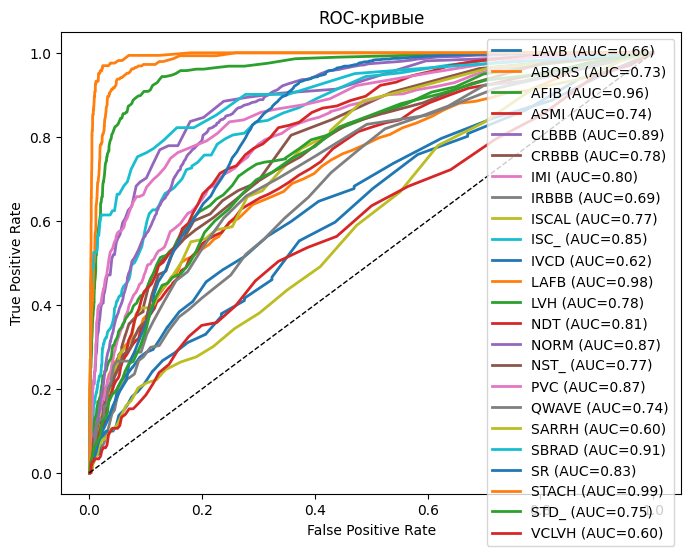

In [23]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

y_score = model.predict_proba(X_test)
y_score = np.array([prob[:, 1] for prob in y_score]).T

roc_auc = roc_auc_score(y_test, y_score, average="macro")
print(f"ROC-AUC (macro): {roc_auc:.3f}")

plt.figure(figsize=(8, 6))
for i, label in enumerate(mlb.classes_):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые")
plt.legend()
plt.show()

In [ ]:
from joblib import dump, load

dump(model, "rf_model.joblib")

In [ ]:
!zip -r hazards_results.zip /kaggle/working
from IPython.display import FileLink
FileLink(r'/kaggle/working/rf_model.joblib')